<a href="https://colab.research.google.com/github/DanielVinicius2/Ciencia-de-Dados/blob/main/Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports utilizados no Código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurando a conexão com o Google Drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Bases de dados/atividade3_dataset.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Criação de um DataFrame baseado em um arquivo .csv
df_csv = pd.read_csv(path)
df_csv

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023
...,...,...,...,...,...,...,...,...
505,395,Bruno,46.0,CURITIBA,Headset,3321.2,2,24-08-2023
506,378,Mariana,62.0,MANAUS,Tablet,3282.26,3,19-05-2025
507,125,João,24.0,MANAUS,Headset,4529.67,5,19-02-2025
508,69,João,25.0,BELO HORIZONTE,Headset,31440.9,8,01-02-2024


In [ ]:
#Print dos 5 primeiros valores(Linhas) do DataFrame
print(df_csv.head())

   ID     Nome  Idade          Cidade   Produto    Preço  Quantidade  \
0   1  Mariana   48.0       FORTALEZA    Tablet  2010,87           7   
1   2    Bruno   42.0  RIO DE JANEIRO   Teclado      NaN           6   
2   3      Ana   54.0  RIO DE JANEIRO   Monitor  3619.29           2   
3   4   Carlos   62.0        CURITIBA   Teclado  40415.9           8   
4   5  Mariana   60.0        CURITIBA  Notebook   716.66           8   

  Data_Compra  
0  30-05-2024  
1  12-04-2025  
2  10-12-2022  
3  31-12-2022  
4  14-09-2023  


In [ ]:
#Informações gerais sobre o DataFrame
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB
None


In [ ]:
#Estatísticas descritivas
print(df_csv.describe(include='all')) #include=’all’

                ID      Nome       Idade        Cidade     Produto    Preço  \
count   510.000000       510  489.000000           510         510      473   
unique         NaN        10         NaN            16           7      465   
top            NaN  Fernanda         NaN  PORTO ALEGRE  Smartphone  2072.31   
freq           NaN        69         NaN            67          85        2   
mean    250.470588       NaN   44.274029           NaN         NaN      NaN   
std     144.525775       NaN   15.320034           NaN         NaN      NaN   
min       1.000000       NaN   18.000000           NaN         NaN      NaN   
25%     125.000000       NaN   31.000000           NaN         NaN      NaN   
50%     250.500000       NaN   44.000000           NaN         NaN      NaN   
75%     375.750000       NaN   58.000000           NaN         NaN      NaN   
max     500.000000       NaN   70.000000           NaN         NaN      NaN   

        Quantidade Data_Compra  
count   510.000000

In [ ]:
# Exibe o nome das colunas existentes
print(df_csv.columns)

Index(['ID', 'Nome', 'Idade', 'Cidade', 'Produto', 'Preço', 'Quantidade',
       'Data_Compra'],
      dtype='object')


In [ ]:
# Exibe todos os valores de uma coluna especifica
df_csv["Nome"]

,Nome
0,Mariana
1,Bruno
2,Ana
3,Carlos
4,Mariana
...,...
505,Bruno
506,Mariana
507,João
508,João


In [ ]:
# Exibe todos os valores de uma combinação de colunas
df_csv[["Cidade", "Produto", "Quantidade"]]

,Cidade,Produto,Quantidade
0,FORTALEZA,Tablet,7
2,RIO DE JANEIRO,Monitor,2
3,CURITIBA,Teclado,8
4,CURITIBA,Notebook,8
5,SALVADOR,Headset,8
...,...,...,...
505,CURITIBA,Headset,2
506,MANAUS,Tablet,3
507,MANAUS,Headset,5
508,BELO HORIZONTE,Headset,8


In [ ]:
#Estatísticas individuais de cada coluna
df_csv["Cidade"].value_counts()

,count
Cidade,
PORTO ALEGRE,68
SALVADOR,63
BELO HORIZONTE,60
RIO DE JANEIRO,55
MANAUS,55
FORTALEZA,54
CURITIBA,54
SÃO PAULO,45


In [ ]:
#O codigo abaixo foi utilizado a fim de Remover problemas de Separação de dados
#com mesmo valor, ou seja, valores finais iguais porém escritos de maneiras diferentes.
#(Ex: São paulo x SÃO PAULO)

df_csv['Cidade'] = df_csv['Cidade'].str.upper()  # Padroniza para maiúsculas
df_contagem_no_duplicatas_cidades = df_csv['Cidade'].value_counts()
print(df_contagem_no_duplicatas_cidades)


Cidade
PORTO ALEGRE      68
SALVADOR          63
BELO HORIZONTE    60
RIO DE JANEIRO    55
MANAUS            55
FORTALEZA         54
CURITIBA          54
SÃO PAULO         45
Name: count, dtype: int64


In [ ]:
#Identifica a Quantidade de valores 'Nulls' em cada coluna
print(df_csv.isnull().sum())

ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64


In [ ]:
#Remove linhas com 'Nulls'
print(df_csv.dropna(inplace=True))

None


In [ ]:
#Preenche os valores 'Nulls' com um valor(Nesse caso, o número 0)
print(df_csv.fillna(0, inplace=True))

None


In [ ]:
print(df_csv.duplicated().sum())

8


In [ ]:
print(df_csv.drop_duplicates())

      ID      Nome  Idade          Cidade     Produto    Preço  Quantidade  \
0      1   Mariana   48.0       FORTALEZA      Tablet  2010,87           7   
2      3       Ana   54.0  RIO DE JANEIRO     Monitor  3619.29           2   
3      4    Carlos   62.0        CURITIBA     Teclado  40415.9           8   
4      5   Mariana   60.0        CURITIBA    Notebook   716.66           8   
5      6   Mariana   18.0        SALVADOR     Headset  2388.44           8   
..   ...       ...    ...             ...         ...      ...         ...   
497  498  Fernanda   41.0       SÃO PAULO     Teclado  1176.08           9   
498  499     Lucas   22.0    PORTO ALEGRE     Teclado  3209.09           5   
499  500     Pedro   46.0  RIO DE JANEIRO     Teclado  3474.99           9   
503  156      João   47.0  belo horizonte  Smartphone  3444,96           7   
508   69      João   25.0  BELO HORIZONTE     Headset  31440.9           8   

    Data_Compra  
0    30-05-2024  
2    10-12-2022  
3    31-1

<Axes: xlabel='Idade', ylabel='Count'>

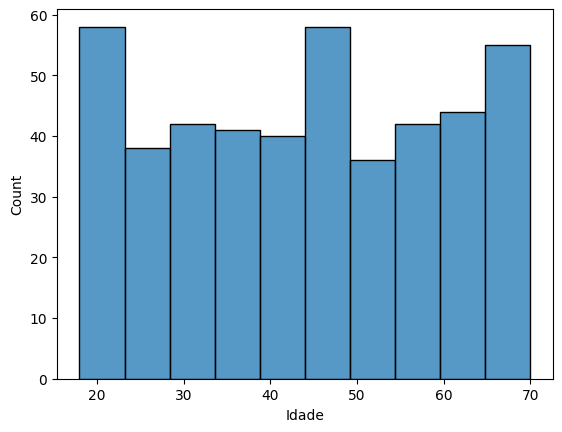

In [ ]:
sns.histplot(df_csv["Idade"])

<Axes: xlabel='Idade'>

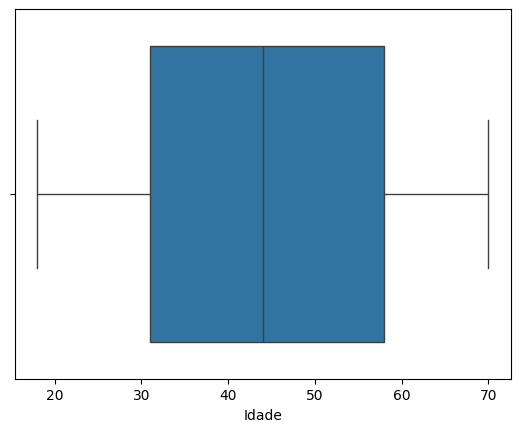

In [ ]:
sns.boxplot(x=df_csv["Idade"])

<Axes: xlabel='Idade', ylabel='Cidade'>

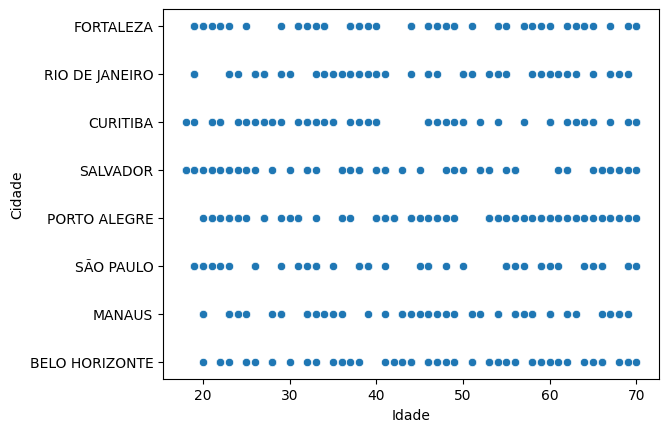

In [ ]:
sns.scatterplot(x="Idade", y="Cidade", data=df_csv)

In [ ]:
df_csv.sort_values(by='Preço', ascending = False)

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
223,224,Mariana,23.0,SALVADOR,Headset,996.94,10,19-11-2023
291,292,Mariana,69.0,BELO HORIZONTE,Notebook,978.45,4,19-04-2024
72,73,Bruno,19.0,FORTALEZA,Mouse,975.36,9,14-03-2025
14,15,Carlos,67.0,FORTALEZA,Tablet,971.26,10,29-01-2024
484,485,Lucas,23.0,PORTO ALEGRE,Notebook,964.51,4,30-09-2024
...,...,...,...,...,...,...,...,...
408,409,Carlos,46.0,FORTALEZA,Mouse,1032.38,5,13-11-2023
35,36,Pedro,23.0,FORTALEZA,Headset,1019.79,10,18-08-2025
239,240,João,41.0,SALVADOR,Mouse,1012.24,2,18-06-2023
385,386,Lucas,69.0,SÃO PAULO,Smartphone,1010.18,9,08-03-2024
